# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [210]:
! git clone https://github.com/ds4e/wrangling

fatal: destination path 'wrangling' already exists and is not an empty directory.


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [211]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Q1 Part 1

In [212]:
airbnb = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory=False)

airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [213]:
airbnb['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [214]:
sum(airbnb['Price'].isna())

0

In [215]:
len(airbnb['Price'])

30478

In [216]:
from numpy import sqrt
sqrt(30478)

174.57949478675897

<Axes: >

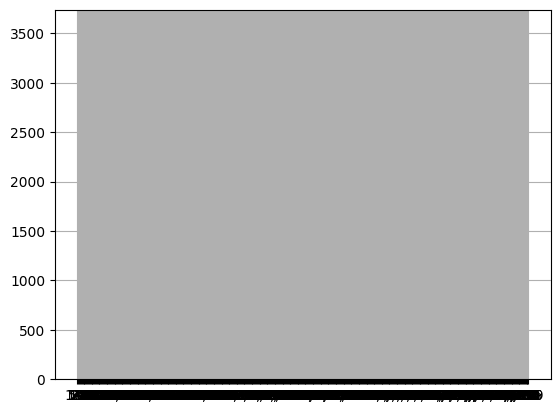

In [217]:
airbnb['Price'].hist(bins=174) # Something is going wrong

In [218]:
airbnb['Price'].describe() # Clearly this is not numeric data type

,Price
count,30478
unique,511
top,150
freq,1481


In [219]:
airbnb['Price'].dtype # This confirms not integer data type

dtype('O')

In [220]:
airbnb['Price'] = airbnb['Price'].str.replace(',', '').astype(int) # Clean strings with commas like '1,200', and convert to integer

In [221]:
sum(airbnb['Price'].isna()) # This did not introduce NAs

0

<Axes: >

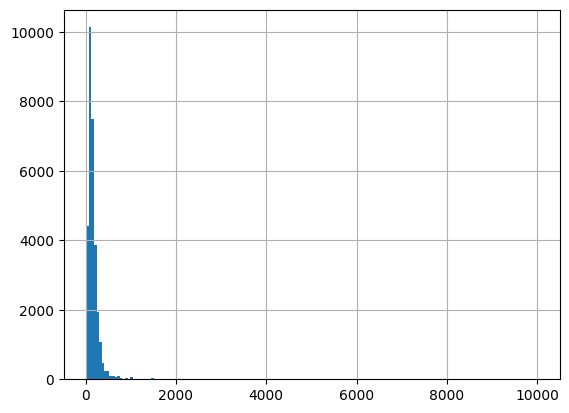

In [222]:
airbnb['Price'].hist(bins=174) # This looks better

In [223]:
airbnb['Price'].describe() # This looks better

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x79c62af94510>,
 'caps': [<matplotlib.lines.Line2D at 0x79c62af959d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c62af4d950>],
 'medians': [<matplotlib.lines.Line2D at 0x79c62af96dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c62af97710>],
 'means': []}

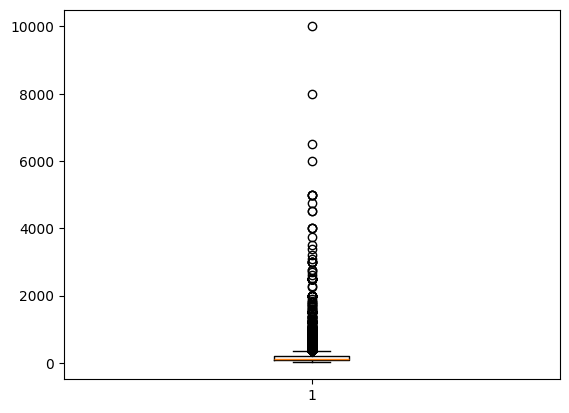

In [224]:
fig, ax = plt.subplots()
ax.boxplot(airbnb['Price'])

# Question 1 Part 2

In [225]:
mn_police = pd.read_csv('/content/wrangling/assignment/data/mn_police_use_of_force.csv')

In [226]:
sum(mn_police['subject_injury'].isna()) / len(mn_police['subject_injury'])

0.7619342359767892

This is a problem. 76% of column values are missing.

In [227]:
mn_police['subject_injury'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [228]:
len(mn_police)

12925

In [229]:
pd.crosstab(mn_police['subject_injury'],mn_police['force_type'], dropna=False)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


Yes, there is a pattern in the missing values. For example, all less lethal force types have a missing subject injury. All maximal restraint technique force types also have missing subject injury. Why aren't they reporting the subject injury for these force types? Since there is a pattern, and 76% of subject injury column is null, merely dropping this column may misrepresent reality and introduce bias.

# Q1 Part 3

In [230]:
justice = pd.read_parquet('/content/wrangling/assignment/data/justice_data.parquet')
justice.columns

Index(['InternalStudyID', 'REQ_REC#', 'Defendant_Sex', 'Defendant_Race',
       'Defendant_BirthYear', 'Defendant_Age', 'Defendant_AgeGroup',
       'Defendant_AgeatCurrentArrest', 'Defendant_AttorneyTypeAtCaseClosure',
       'Defendant_IndigencyStatus',
       ...
       'NewFelonySexualAssaultArrest_OffDate',
       'NewFelonySexualAssaultArrest_ArrestDate',
       'NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate',
       'NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate',
       'NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate',
       'NewFelonySexualAssaultArrest_Disposition',
       'Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis',
       'CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual',
       'DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound',
       'CrimeCommission2021ReportClassificationofDefendants'],
      dtype='object', length=709)

In [231]:
justice = justice.rename(columns = {'BondAmountAtInitialContact':'bond',
                    'Defendant_IndigencyStatus':'is_poor',
                    'CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp':'case_type',
                    'WhetherDefendantWasReleasedPretrial':'released'})

In [232]:
justice['released'].unique()

array([9, 0, 1])

In [233]:
justice['released'] = justice['released'].replace(9,np.nan)
justice['released'].unique() # 9 = unknown, so nan is better.

array([nan,  0.,  1.])

# Q1 Part 4

In [234]:
sum(justice['ImposedSentenceAllChargeInContactEvent'].isna())

0

In [235]:
justice['ImposedSentenceAllChargeInContactEvent'].unique() # First entry is blank, should be nan

array([' ', '60', '12', '.985626283367556', '36', '6', '24',
       '5.91375770020534', '120', '72', '11.9917864476386', '0',
       '2.95687885010267', '84', '108', '300', '240', '180', '4', '96',
       '2', '54', '.328542094455852', '44', '5', '115', '132', '48',
       '258', '34', '76', '.164271047227926', '.131416837782341', '111',
       '9', '3', '1.97125256673511', '36.9856262833676',
       '.0657084188911704', '35.4928131416838', '106.492813141684', '8',
       '35', '18.3141683778234', '480', '32', '93', '234', '732',
       '1.16427104722793', '4.6570841889117', '21', '7',
       '4.49281314168378', '18', '600', '43.1642710472279', '179', '52',
       '30', '20', '192', '702', '14', '55', '53', '11.9055441478439',
       '114', '35.0061601642711', '68', '.657084188911704',
       '46.6242299794661', '102', '65', '200', '57', '24.3285420944559',
       '12.1642710472279', '117', '81.4928131416838', '22.4928131416838',
       '1980', '3.6570841889117', '56', '10', '2.7926078

In [236]:
justice['ImposedSentenceAllChargeInContactEvent'] = justice['ImposedSentenceAllChargeInContactEvent'].replace(' ',np.nan)

In [237]:
sum(justice['ImposedSentenceAllChargeInContactEvent'].isna()) / len(justice['ImposedSentenceAllChargeInContactEvent'])

0.3938484294788132

In [238]:
pd.crosstab(justice['ImposedSentenceAllChargeInContactEvent'].isna(), justice['SentenceTypeAllChargesAtConvictionInContactEvent'])


SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent,,,,,
False,8720,4299,914,0,0
True,0,0,0,8779,274


There are NAs for imposedsentence when sentence type is 4 or 9.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [239]:
# Q2 P1
sharks = pd.read_excel('/content/wrangling/data/GSAF5.xls')
pd.set_option('display.max_columns', None)

sharks.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,Injuries to stomach preventing attack on friend,N,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,Entire calf muscle removed and bitten both arm...,Y,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q2 P2

In [240]:
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [241]:
non_null_values = sharks['Unnamed: 22'].dropna()
print(non_null_values)

5093             Teramo
6521    change filename
Name: Unnamed: 22, dtype: object


In [242]:
non_null_values = sharks['Unnamed: 21'].dropna()
print(non_null_values)

2149    stopped here
Name: Unnamed: 21, dtype: object


In [243]:
sharks = sharks.dropna(axis=1, how='all') # used Chat to code this line; if there were column with all NAs, this would have dropped, but no column is all null
sharks = sharks.drop(columns = ['Unnamed: 21','Unnamed: 22'])

# Q2 P3

In [244]:
sharks['Year'].unique()

array([2025., 2024., 2026., 2023., 2022., 2021., 2020., 2019., 2018.,
       2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901.,

In [245]:
sharks['Year'].dtype

dtype('float64')

In [246]:
sharks['Year'].describe()

,Year
count,6988.000000
mean,1934.992845
std,272.117473
min,0.000000
25%,1947.000000
50%,1985.500000
75%,2009.000000
max,2026.000000


In [ ]:
sharks['Year']

In [265]:
sharks['Year'] = sharks['Year'].replace(0,np.nan)
sharks['Year'] = sharks['Year'].replace(5,np.nan)
sharks['Year'] = sharks['Year'].replace(77,np.nan)
sharks['Year'] = sharks['Year'].replace(1000,np.nan)
sharks['Year'] = sharks['Year'].replace(1500,np.nan)
sharks['Year'] = sharks['Year'].replace(1518,np.nan)
sharks['Year'] = sharks['Year'].replace(1543,np.nan)
sharks['Year'] = sharks['Year'].replace(1554,np.nan)
sharks['Year'] = sharks['Year'].replace(1555,np.nan)
sharks['Year'] = sharks['Year'].replace(1580,np.nan)
sharks['Year'] = sharks['Year'].replace(2026,np.nan)

sharks['Year'] = sharks['Year'].where(sharks['Year'] >= 1749, np.nan) # Used ChatGPT to code this. See comment below.
# According to Google, # The first documented shark attack in history occurred in 1749 when the British seaman Brook Watson went for a swim in the waters off Havana Harbor, Cuba.

sharks['Year'].describe()

,Year
count,6831.000000
mean,1973.219441
std,45.634566
min,1749.000000
25%,1951.000000
50%,1988.000000
75%,2010.000000
max,2025.000000


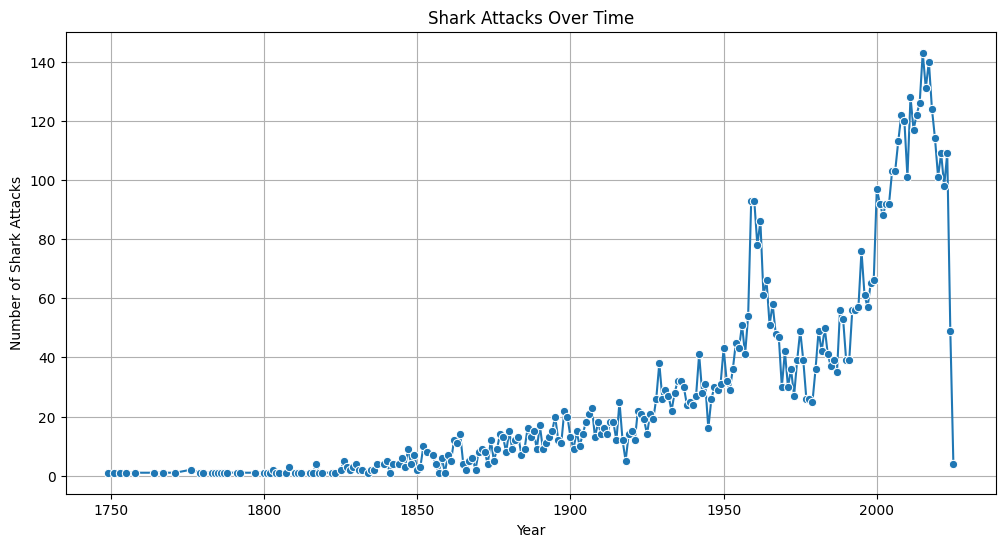

In [270]:
import seaborn as sns

sharks = sharks.dropna(subset=['Year'])

shark_counts = sharks['Year'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x=shark_counts.index, y=shark_counts.values, marker='o')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks Over Time')
plt.grid(True)

# Show the plot
plt.show()

# Had ChatGPT help me with plotting code. Shark attacks are increasing over time.

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about how to make data cleaning as easy and effective as possible in particular data tidying.

2. The "tidy data standard" is intended to "facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together."

3.  The sentence, "Like families, tidy datasets are all alike but every messy dataset is messy in its own way", means that each dataset has its own problems in terms of not being ready for analysis without first having to clean it, but there are patterns / common themes of what makes a dataset messy, which means there are common tools and methods that one can utilize to reach the tidy dataset standard.

  Earlier in the reading, the author writes, "A variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units. An observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes." The sentence, "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.", means that even if a dataset has "height" and "width" as variables of the dataset, whether they measure the underlying attribute across units sometimes depends on the context and how the data is structured.

4. Values are what comprise a dataset, usually either numbers or strings. As mentioned above, variables are defined as all values that measure the same underlying attribute across units, and observations are defined as containing all values measured on the same unit across attributes.

5. Tidy data is defined as a standard way of mapping the meaning of a dataset to its structure. In particular, in tidy data, each variable forms a column, each observatio nforms a row, and each type of observational unit forms a table.

6. The five most common problems with messy datasets are:
  1. Column headers are values not variable names
  2. Multiple variables are stored in one column.
  3. Variables are stored in both rows and columns.
  4. Multiple types of observational units are stored in the same table.
  5. A single observational unit is stored in multiple tables.

Table 4 is messy because it is not melted. Melting a dataset means to stack it or to turn columns into rows.

7. Table 11 is messy because there is a column for each possible day in the month. Table 12 is tidy and molten because each row represents the metorological measurements for a single day. There are two measured variables, the minimum and max temperature. All the other variables are fixed.

8. The chicken and the egg problem with tidy data is that the tools to make data tidy only really work when the data is tidy in some fashion, so they kind of depend on each other, so it is hard to make significant improvements, and it requires a long-term effort to make data tidier and tidy tools more effective.


**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?